# Exploratory Data Analysis

In [70]:
import os
import sys
import json
from json.decoder import JSONDecodeError
import webbrowser
import spotipy
import spotipy.util as util
from pprint import pprint

# visualization libraries
import seaborn as sns  
import matplotlib.pyplot as plt
from matplotlib import style
% matplotlib inline

import pandas as pd
import numpy as np

import fuzzyset

from collections import Counter

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [13]:
aggregate_genres = [{"rock": ["symphonic rock", "jazz-rock", "heartland rock", "rap rock", "garage rock", "folk-rock", "roots rock", "adult alternative pop rock", "rock roll", "punk rock", "arena rock", "pop-rock", "glam rock", "southern rock", "indie rock", "funk rock", "country rock", "piano rock", "art rock", "rockabilly", "acoustic rock", "progressive rock", "folk rock", "psychedelic rock", "rock & roll", "blues rock", "alternative rock", "rock and roll", "soft rock", "rock and indie", "hard rock", "pop/rock", "pop rock", "rock", "classic pop and rock", "psychedelic", "british psychedelia", "punk", "metal", "heavy metal"]},
{"alternative/indie": ["adult alternative pop rock", "alternative rock", "alternative metal", "alternative", "lo-fi indie", "indie", "indie folk", "indietronica", "indie pop", "indie rock", "rock and indie"]},
{"electronic/dance": ["dance and electronica", "electro house", "electronic", "electropop", "progressive house", "hip house", "house", "eurodance", "dancehall", "dance", "trap"]},
{"soul": ["psychedelic soul", "deep soul", "neo-soul", "neo soul", "southern soul", "smooth soul", "blue-eyed soul", "soul and reggae", "soul"]},
{"classical/soundtrack": ["classical", "orchestral", "film soundtrack", "composer"]},
{"pop": ["country-pop", "latin pop", "classical pop", "pop-metal", "orchestral pop", "instrumental pop", "indie pop", "sophisti-pop", "pop punk", "pop reggae", "britpop", "traditional pop", "power pop", "sunshine pop", "baroque pop", "synthpop", "art pop", "teen pop", "psychedelic pop", "folk pop", "country pop", "pop rap", "pop soul", "pop and chart", "dance-pop", "pop", "top 40"]},
{"hip-hop/rnb": ["conscious hip hop", "east coast hip hop", "hardcore hip hop", "west coast hip hop", "hiphop", "southern hip hop", "hip-hop", "hip hop", "hip hop rnb and dance hall", "contemporary r b", "gangsta rap", "rapper", "rap", "rhythm and blues", "contemporary rnb", "contemporary r&b", "rnb", "rhythm & blues","r&b", "blues"]},
{"disco": ["disco"]},
{"swing":  ["swing"]},
{"folk": ["contemporary folk", "folk"]},
{"country": ["country rock", "country-pop", "country pop", "contemporary country", "country"]},
{"jazz": ["vocal jazz", "jazz", "jazz-rock"]},
{"religious": ["christian", "christmas music", "gospel"]},
{"blues": ["delta blues", "rock blues", "urban blues", "electric blues", "acoustic blues", "soul blues", "country blues", "jump blues", "classic rock. blues rock", "jazz and blues", "piano blues", "british blues", "british rhythm & blues", "rhythm and blues", "blues", "blues rock", "rhythm & blues"]},
{"reggae": ["reggae fusion", "roots reggae", "reggaeton", "pop reggae", "reggae", "soul and reggae"]}]

In [14]:
# load dataframe, without audio features, but no missing lyrics
df_final_set = pd.read_pickle("data/billboard_tracks_1950_2018_FINAL_v2.pkl")

## Flesch-Kincaid Grade Level of Songs - Trend'

Saving graph to: images/f_k_grade_trend_yearly.svg


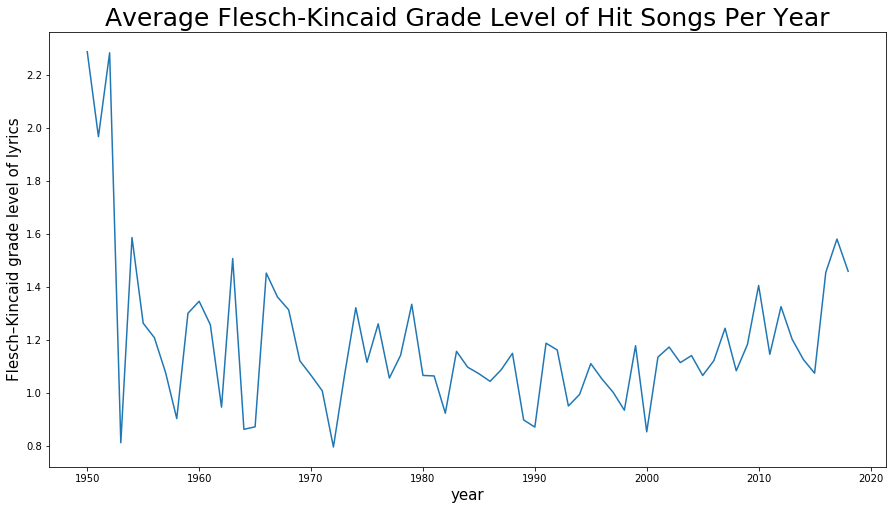

In [3]:
plt.figure(figsize=(15,8))
plt.plot(df_final_set.groupby(['year'])['f_k_grade'].mean())
plt.title('Average Flesch-Kincaid Grade Level of Hit Songs Per Year',fontsize=25)
plt.xlabel('year',fontsize=15)
plt.ylabel('Flesch–Kincaid grade level of lyrics',fontsize=15);

# Save options
save = 'images/f_k_grade_trend_yearly'

if save:
    print('Saving graph to:', save + '.svg')
    plt.savefig(save + '.svg', format='svg')

## Song Repetitiveness - Trend

Saving graph to: images/repetitive_lyrics_trend_yearly.svg


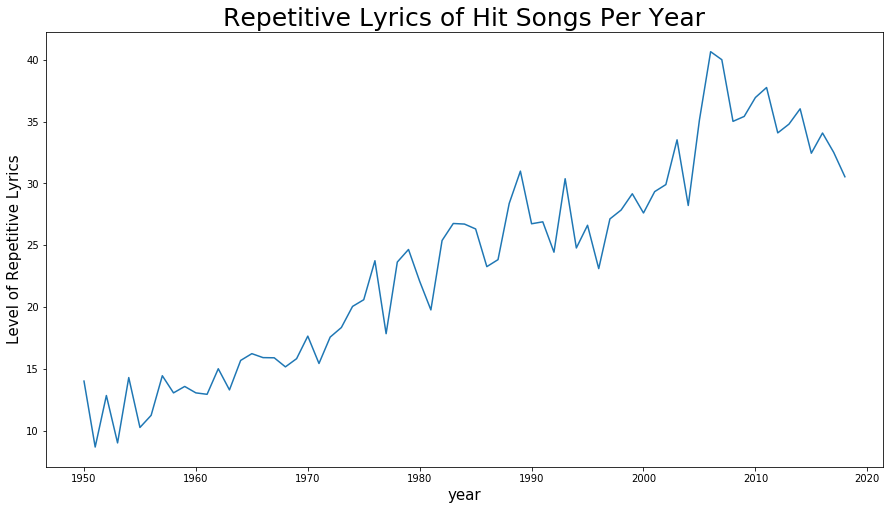

In [4]:
plt.figure(figsize=(15,8))
plt.plot(df_final_set.groupby(['year'])['num_dupes'].mean())
plt.title('Repetitive Lyrics of Hit Songs Per Year',fontsize=25)
plt.xlabel('year',fontsize=15)
plt.ylabel('Level of Repetitive Lyrics',fontsize=15);

# Save options
save = 'images/repetitive_lyrics_trend_yearly'

if save:
    print('Saving graph to:', save + '.svg')
    plt.savefig(save + '.svg', format='svg')

## Song sentiment analysis - trend

Saving graph to: images/sentiment_analysis_trend_yearly.svg


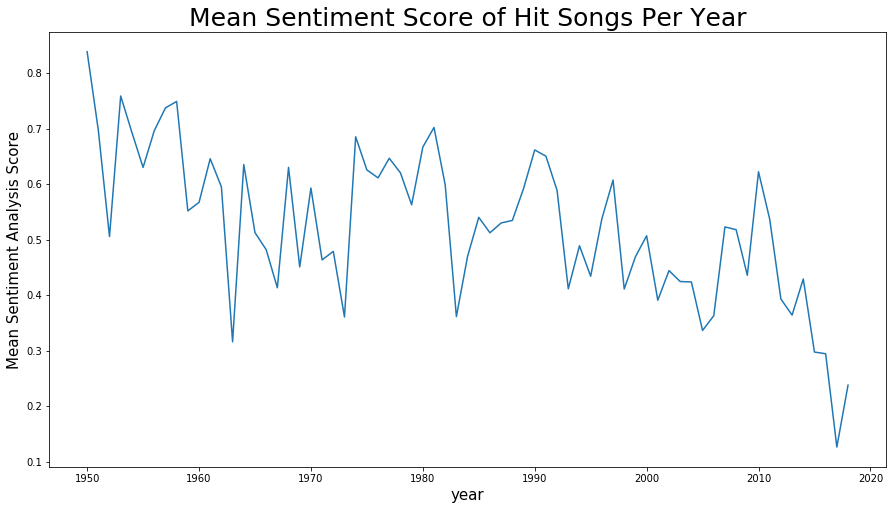

In [5]:
plt.figure(figsize=(15,8))
plt.plot(df_final_set.groupby(['year'])['sentiment_compound'].mean())
plt.title('Mean Sentiment Score of Hit Songs Per Year',fontsize=25)
plt.xlabel('year',fontsize=15)
plt.ylabel('Mean Sentiment Analysis Score',fontsize=15);

# Save options
save = 'images/sentiment_analysis_trend_yearly'

if save:
    print('Saving graph to:', save + '.svg')
    plt.savefig(save + '.svg', format='svg')

## per above, songs every year generally stay positive (with polarity > +0.05) - however, there is a downward trend

# Let's make our graphs / make them look pretty!

In [6]:
# available styles
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


Saving graph to: images/sentiment_analysis_trend_decade.svg


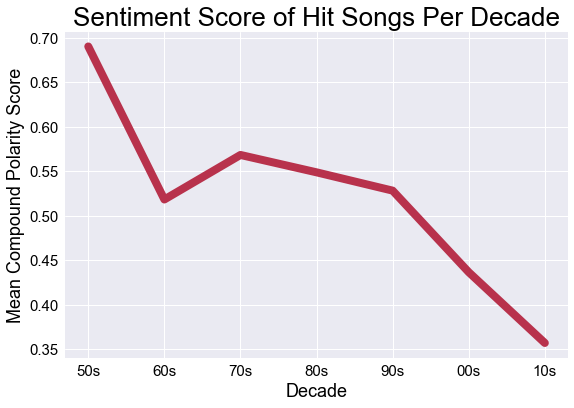

In [8]:
style.use('seaborn')
plt.figure(figsize=(9,6))
plt.plot(df_final_set.groupby(['decade'],sort=False)['sentiment_compound'].mean(),color='#B8324C',linewidth=8)
plt.title('Sentiment Score of Hit Songs Per Decade',fontsize=26,color='black')
plt.xlabel('Decade',fontsize=18,color='black')
plt.ylabel('Mean Compound Polarity Score',fontsize=18,color='black')
plt.xticks(color='black',fontsize=15)
plt.yticks(color='black',fontsize=15)

# Save options
save = 'images/sentiment_analysis_trend_decade'

if save:
    print('Saving graph to:', save + '.svg')
    plt.savefig(save + '.svg', format='svg')

Saving graph to: images/repetitive_lyrics_trend_decade.svg


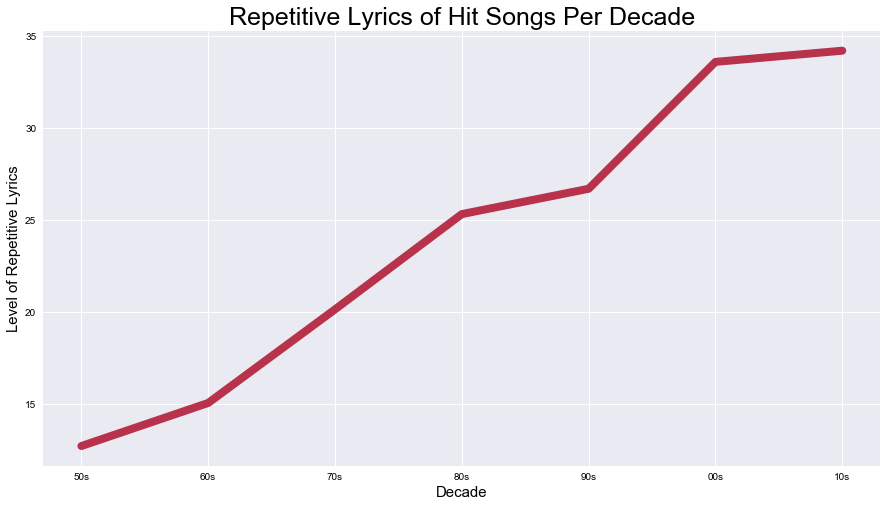

In [9]:
plt.figure(figsize=(15,8))
plt.plot(df_final_set.groupby(['decade'],sort=False)['num_dupes'].mean(),linewidth=8,color='#B8324C')
plt.title('Repetitive Lyrics of Hit Songs Per Decade',fontsize=25,color='black')
plt.xlabel('Decade',fontsize=15,color='black')
plt.ylabel('Level of Repetitive Lyrics',fontsize=15,color='black')
plt.xticks(color='black')
plt.yticks(color='black');

# Save options
save = 'images/repetitive_lyrics_trend_decade'

if save:
    print('Saving graph to:', save + '.svg')
    plt.savefig(save + '.svg', format='svg')

# Gunning-Fog Index + Flesh-Kincaid Grade Level

>While the top few are most explanatory, the Gunning-Fog Index and Flesh-Kincaid Grade Level are the most powerful. Both of these metrics use a variety of linguistics data like average sentence length, word, length, and complexity/number of syllables to determine the readability of a text. These metrics allows us to graph the trend over time for specific genres, i.e. you would need to be in 2nd grade to understand the average pop song from 1972.

Saving graph to: images/f_k_grade_trend_decade.svg


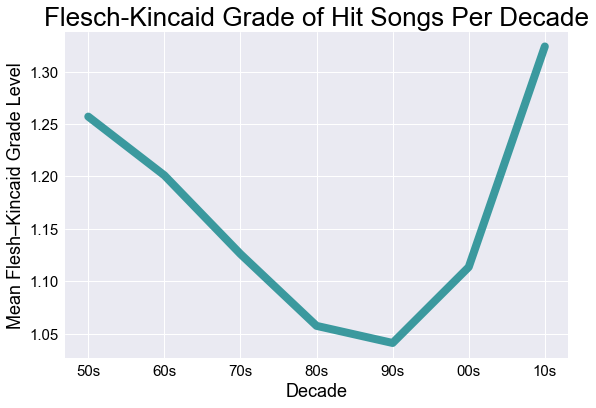

In [10]:
plt.figure(figsize=(9,6))
plt.plot(df_final_set.groupby(['decade'],sort=False)['f_k_grade'].mean(),label='Flesch-Kincaid Grade Level',color='#3B999E',linewidth=8)
plt.title('Flesch-Kincaid Grade of Hit Songs Per Decade',fontsize=26,color='black')
plt.xlabel('Decade',fontsize=18,color='black')
plt.ylabel('Mean Flesh–Kincaid Grade Level',fontsize=18,color='black')
plt.xticks(color='black',fontsize=15)
plt.yticks(color='black',fontsize=15);


# Save options
save = 'images/f_k_grade_trend_decade'

if save:
    print('Saving graph to:', save + '.svg')
    plt.savefig(save + '.svg', format='svg')

# iterate through the genres in aggregate_genre list and plot genre representation per each decade's Billboard Hot 100 charts

In [17]:
genre_freq_dict = {}

for genre in aggregate_genres:
    for agg_genre in genre.keys():

        counter = 0
        temp_list = []

        for key, value in df_final_set.loc[df_final_set['agg_genre']==agg_genre].groupby(['decade'],sort=False):


            tracker = True

            while tracker:

                if counter == 0 and key != '50s':
                    temp_list.append(0)
                    counter +=1
                elif counter == 1 and key != '60s':
                    temp_list.append(0)
                    counter +=1
                elif counter == 2 and key != '70s':
                    temp_list.append(0)
                    counter +=1
                elif counter == 3 and key != '80s':
                    temp_list.append(0)
                    counter +=1
                elif counter == 4 and key != '90s':
                    temp_list.append(0)
                    counter +=1
                elif counter == 5 and key != '00s':
                    temp_list.append(0)
                    counter +=1
                elif counter == 6 and key != '10s':
                    temp_list.append(0)
                    counter +=1
                else:
                    temp_list.append(value['agg_genre'].count())
                    counter +=1
                    tracker=False
                    
        if len(temp_list) != 7:
            for _ in range(7-len(temp_list)):
                temp_list.append(0)

        genre_freq_dict[agg_genre] = temp_list

In [18]:
genre_freq_dict

{'rock': [43, 191, 287, 337, 171, 107, 46],
 'alternative/indie': [0, 24, 11, 17, 22, 22, 33],
 'electronic/dance': [0, 0, 0, 34, 35, 40, 152],
 'soul': [2, 69, 58, 44, 31, 16, 15],
 'classical/soundtrack': [0, 0, 12, 7, 0, 0, 5],
 'pop': [11, 55, 36, 104, 121, 136, 150],
 'hip-hop/rnb': [0, 7, 14, 29, 178, 285, 211],
 'disco': [0, 5, 62, 54, 8, 11, 6],
 'swing': [18, 4, 1, 0, 0, 0, 0],
 'folk': [10, 28, 53, 30, 20, 9, 2],
 'country': [12, 20, 32, 35, 19, 65, 81],
 'jazz': [30, 11, 16, 16, 2, 1, 1],
 'religious': [29, 18, 2, 0, 13, 5, 8],
 'blues': [1, 20, 8, 5, 5, 1, 1],
 'reggae': [0, 0, 1, 5, 20, 22, 5]}

In [19]:
raw_data = genre_freq_dict
df_genre_count = pd.DataFrame(raw_data)
df_genre_count

,rock,alternative/indie,electronic/dance,soul,classical/soundtrack,pop,hip-hop/rnb,disco,swing,folk,country,jazz,religious,blues,reggae
0,43,0,0,2,0,11,0,0,18,10,12,30,29,1,0
1,191,24,0,69,0,55,7,5,4,28,20,11,18,20,0
2,287,11,0,58,12,36,14,62,1,53,32,16,2,8,1
3,337,17,34,44,7,104,29,54,0,30,35,16,0,5,5
4,171,22,35,31,0,121,178,8,0,20,19,2,13,5,20
5,107,22,40,16,0,136,285,11,0,9,65,1,5,1,22
6,46,33,152,15,5,150,211,6,0,2,81,1,8,1,5


### graph results

We will emphasize the genres 'rock', 'hip-hop / R&B', 'Pop', and 'Electronic / Dance' by making other genres somewhat transparent

Saving graph to: images/genres_breakdown.svg


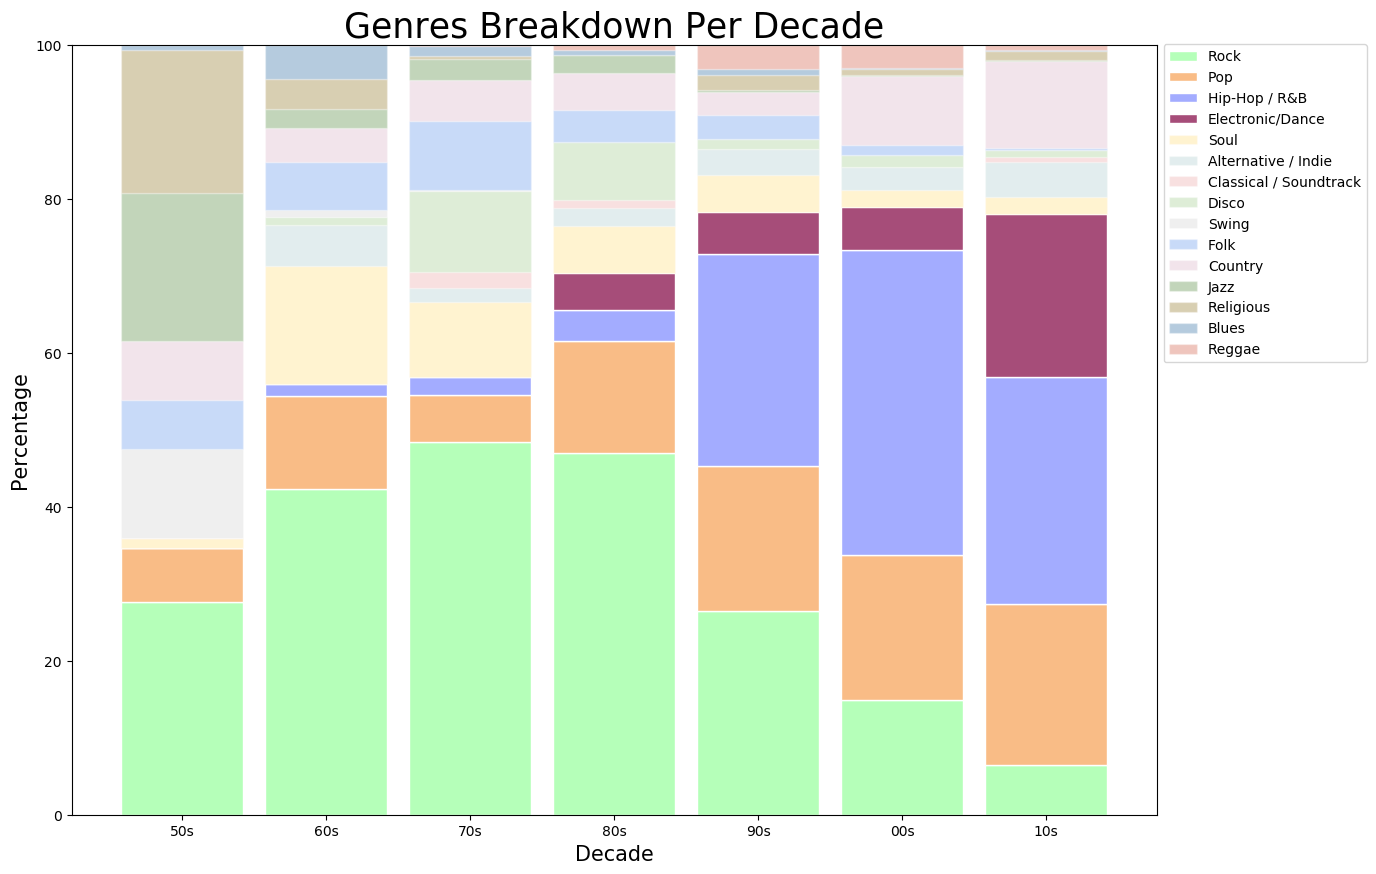

In [20]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd

# style to use for plot
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
#style.use()
 
# Data
r = [0,1,2,3,4,5,6]

raw_data = genre_freq_dict
df_genre_count = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j+k+l+m+n+o+p+q+r+s+t+u+v+w for i,j,k,l,m,n,o,p,q,r,s,t,u,v,w in zip(
                                 df_genre_count['rock'], df_genre_count['alternative/indie'], 
                                 df_genre_count['electronic/dance'], df_genre_count['soul'],
                                 df_genre_count['classical/soundtrack'], df_genre_count['pop'], 
                                 df_genre_count['hip-hop/rnb'], df_genre_count['disco'],
                                 df_genre_count['swing'], df_genre_count['folk'], df_genre_count['country'], 
                                 df_genre_count['jazz'], df_genre_count['religious'], df_genre_count['blues'], 
                                 df_genre_count['reggae'])]


rock_bar = [i / j * 100 for i,j in zip(df_genre_count['rock'], totals)]
alt_bar = [i / j * 100 for i,j in zip(df_genre_count['alternative/indie'], totals)]
dance_bar = [i / j * 100 for i,j in zip(df_genre_count['electronic/dance'], totals)]
soul_bar = [i / j * 100 for i,j in zip(df_genre_count['soul'], totals)]
classical_bar = [i / j * 100 for i,j in zip(df_genre_count['classical/soundtrack'], totals)]
pop_bar = [i / j * 100 for i,j in zip(df_genre_count['pop'], totals)]
hip_bar = [i / j * 100 for i,j in zip(df_genre_count['hip-hop/rnb'], totals)]
disco_bar = [i / j * 100 for i,j in zip(df_genre_count['disco'], totals)]
swing_bar = [i / j * 100 for i,j in zip(df_genre_count['swing'], totals)]
folk_bar = [i / j * 100 for i,j in zip(df_genre_count['folk'], totals)]
country_bar = [i / j * 100 for i,j in zip(df_genre_count['country'], totals)]
jazz_bar = [i / j * 100 for i,j in zip(df_genre_count['jazz'], totals)]
religious_bar = [i / j * 100 for i,j in zip(df_genre_count['religious'], totals)]
blues_bar = [i / j * 100 for i,j in zip(df_genre_count['blues'], totals)]
reggae_bar = [i / j * 100 for i,j in zip(df_genre_count['reggae'], totals)]



 
# plot
barWidth = 0.85
names = ('50s','60s','70s','80s','90s','00s','10s')

plt.figure(figsize=(14,10))

# Create rock Bars
plt.bar(r, rock_bar, color='#b5ffb9', edgecolor='white', width=barWidth,label='Rock')
# Create pop Bars
plt.bar(r, pop_bar, bottom=rock_bar, color='#f9bc86', edgecolor='white', width=barWidth,label='Pop')
# Create hip-hop Bars
plt.bar(r, hip_bar, bottom=[i+j for i,j in zip(rock_bar, pop_bar)], color='#a3acff', edgecolor='white', width=barWidth,label='Hip-Hop / R&B')
#Create dance Bars
plt.bar(r, dance_bar, bottom=[i+j+k for i,j,k in zip(rock_bar, pop_bar,hip_bar)], color='#a64d79ff', edgecolor='white', width=barWidth,label='Electronic/Dance')
#Create soul Bars
plt.bar(r, soul_bar, bottom=[i+j+k+l for i,j,k,l in zip(rock_bar, pop_bar,hip_bar,dance_bar)], color='#ffd966ff', edgecolor='white', width=barWidth,label='Soul',alpha=0.3)
#Create alternative Bars
plt.bar(r, alt_bar, bottom=[i+j+k+l+m for i,j,k,l,m in zip(rock_bar, pop_bar,hip_bar,dance_bar,soul_bar)], color='#a2c4c9ff', edgecolor='white', width=barWidth,label='Alternative / Indie',alpha=0.3)
#Create classical Bars
plt.bar(r, classical_bar, bottom=[i+j+k+l+m+n for i,j,k,l,m,n in zip(rock_bar, pop_bar,hip_bar,dance_bar,soul_bar,alt_bar)], color='#ea9999ff', edgecolor='white', width=barWidth,label='Classical / Soundtrack',alpha=0.3)
#Create disco Bars
plt.bar(r, disco_bar, bottom=[i+j+k+l+m+n+o for i,j,k,l,m,n,o in zip(rock_bar, pop_bar,hip_bar,dance_bar,soul_bar,alt_bar,classical_bar)], color='#93c47dff', edgecolor='white', width=barWidth,label='Disco',alpha=0.3)
#Create swing Bars
plt.bar(r, swing_bar, bottom=[i+j+k+l+m+n+o+p for i,j,k,l,m,n,o,p in zip(rock_bar, pop_bar,hip_bar,dance_bar,soul_bar,alt_bar,classical_bar,disco_bar)], color='#ccccccff', edgecolor='white', width=barWidth,label='Swing',alpha=0.3)
#Create folk Bars
plt.bar(r, folk_bar, bottom=[i+j+k+l+m+n+o+p+q for i,j,k,l,m,n,o,p,q in zip(rock_bar, pop_bar,hip_bar,dance_bar,soul_bar,alt_bar,classical_bar,disco_bar,swing_bar)], color='#4a86e8ff', edgecolor='white', width=barWidth,label='Folk',alpha=0.3)
#Create country Bars
plt.bar(r, country_bar, bottom=[i+j+k+l+m+n+o+p+q+r for i,j,k,l,m,n,o,p,q,r in zip(rock_bar, pop_bar,hip_bar,dance_bar,soul_bar,alt_bar,classical_bar,disco_bar,swing_bar,folk_bar)], color='#d5a6bdff', edgecolor='white', width=barWidth,label='Country',alpha=0.3)
#Create jazz Bars
plt.bar(r, jazz_bar, bottom=[i+j+k+l+m+n+o+p+q+r+s for i,j,k,l,m,n,o,p,q,r,s in zip(rock_bar, pop_bar,hip_bar,dance_bar,soul_bar,alt_bar,classical_bar,disco_bar,swing_bar,folk_bar,country_bar)], color='#38761dff', edgecolor='white', width=barWidth,label='Jazz',alpha=0.3)
#Create religious Bars
plt.bar(r, religious_bar, bottom=[i+j+k+l+m+n+o+p+q+r+s+t for i,j,k,l,m,n,o,p,q,r,s,t in zip(rock_bar, pop_bar,hip_bar,dance_bar,soul_bar,alt_bar,classical_bar,disco_bar,swing_bar,folk_bar,country_bar,jazz_bar)], color='#7f6000ff', edgecolor='white', width=barWidth,label='Religious',alpha=0.3)
#Create Blues Bars
plt.bar(r, blues_bar, bottom=[i+j+k+l+m+n+o+p+q+r+s+t+u for i,j,k,l,m,n,o,p,q,r,s,t,u in zip(rock_bar, pop_bar,hip_bar,dance_bar,soul_bar,alt_bar,classical_bar,disco_bar,swing_bar,folk_bar,country_bar,jazz_bar,religious_bar)], color='#0b5394ff', edgecolor='white', width=barWidth,label='Blues',alpha=0.3)
#Create Reggae Bars
plt.bar(r, reggae_bar, bottom=[i+j+k+l+m+n+o+p+q+r+s+t+u+v for i,j,k,l,m,n,o,p,q,r,s,t,u,v in zip(rock_bar, pop_bar,hip_bar,dance_bar,soul_bar,alt_bar,classical_bar,disco_bar,swing_bar,folk_bar,country_bar,jazz_bar,religious_bar,blues_bar)], color='#cc4125ff', edgecolor='white', width=barWidth,label='Reggae',alpha=0.3)




# Custom x axis
plt.title('Genres Breakdown Per Decade',fontsize=25)
plt.xticks(r, names)
plt.xlabel("Decade",fontsize=15)
plt.ylabel("Percentage",fontsize=15)
plt.legend(loc=9, bbox_to_anchor=(1.1, 1.01))


# Save options
save = 'images/genres_breakdown'

if save:
    print('Saving graph to:', save + '.svg')
    plt.savefig(save + '.svg', format='svg')

# Show graphic
plt.show()

# let's see how each genre fares in terms of word-based features
We will want to look at the following features:
- speechiness
- difficult_words
- num_words
- num_syllables

## Helper function to plot feature frequency across all genres

In [22]:
import matplotlib.pyplot as plt
import numpy as np

def plot_word_features(feature,title,xlab,color,ascend=False):
    '''
    plot feature frequency across all genres
    Params:
    feature = song feature you want to plot for all genres
    title = plot's title name
    xlab = x-axis label name
    color = color of horizontal bars
    '''
    
    #plt.rcdefaults()
    fig, ax = plt.subplots(figsize=(10,9))

    # Define y-axis labels (genres)
    genres_df = df_final_set.groupby(['agg_genre'],sort=False)[[feature]].mean()
    genres_df = genres_df.loc[genres_df.index != 'N/A']
    genres_arr = genres_df.sort_values(by=feature,ascending=ascend).index.values

    y_pos = np.arange(len(genres_arr))

    # Define x-axis labels (e.g. 'speechiness')
    performance_df = df_final_set.groupby(['agg_genre'],sort=False)[[feature]].mean()
    performance_df = performance_df.loc[performance_df.index != 'N/A']
    performance_arr = performance_df.sort_values(by=feature,ascending=ascend)[feature].values

    ax.barh(y_pos, performance_arr, xerr=None, align='center',
            color=color)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(genres_arr,fontsize=13)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel(xlab,fontsize=18)
    ax.set_ylabel('Genre',fontsize=18)
    ax.set_title(title,fontsize=26)
    
    # Save options
    save = 'images/' + str(feature) + '_breakdown'

    if save:
        print('Saving graph to:', save + '.svg')
        plt.savefig(save + '.svg', format='svg')

    plt.show()

# "Speechiness" breakdown across genres

In [25]:
style.use('seaborn')

Saving graph to: images/speechiness_breakdown.svg


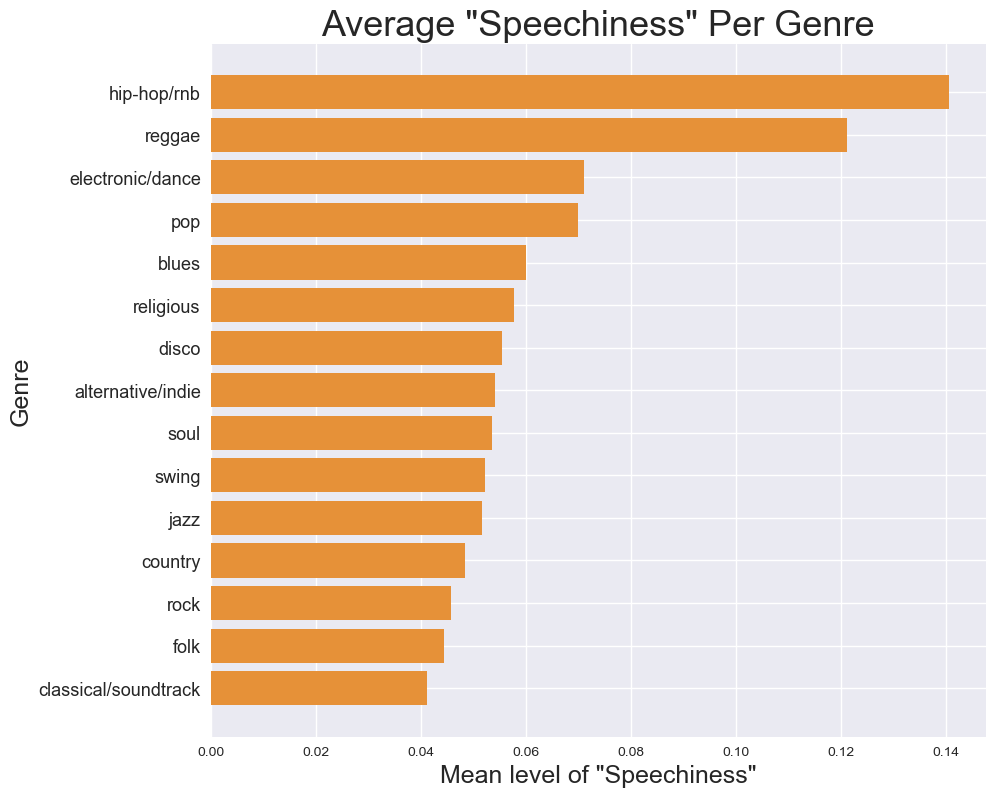

In [26]:
plot_word_features('speechiness','Average "Speechiness" Per Genre','Mean level of "Speechiness"','#e69138ff')

# Difficult Words Breakdown across genres

Saving graph to: images/difficult_words_breakdown.svg


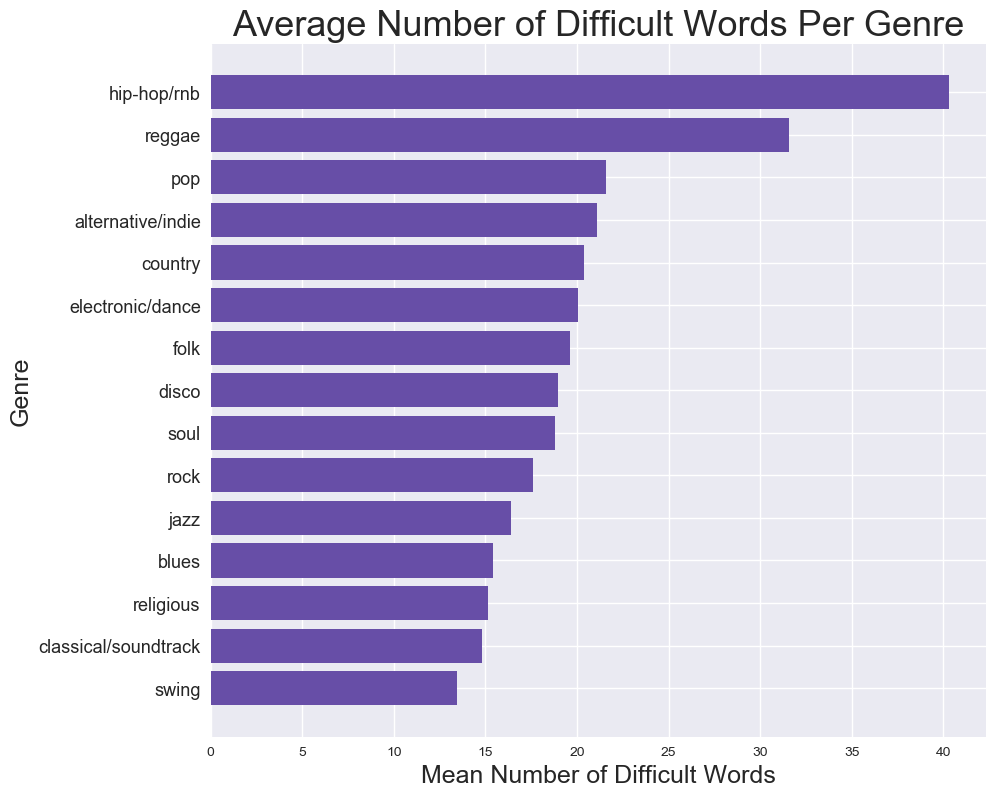

In [27]:
plot_word_features('difficult_words','Average Number of Difficult Words Per Genre','Mean Number of Difficult Words','#674ea7')

# Word Count breakdown across genres

Saving graph to: images/num_words_breakdown.svg


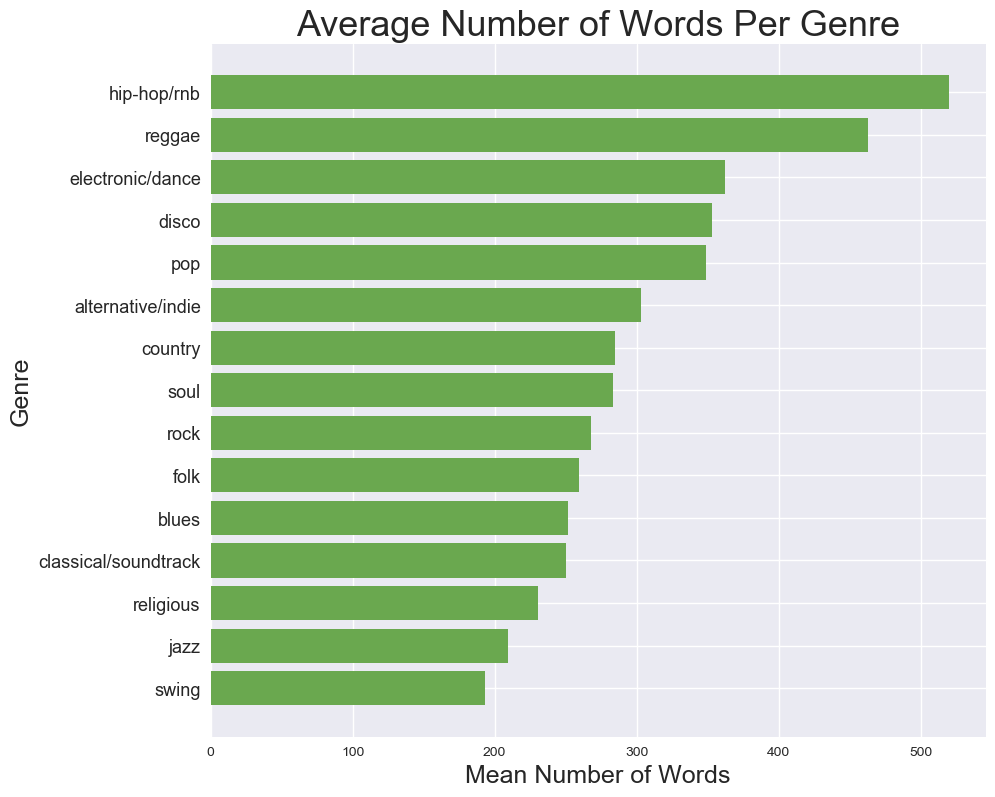

In [28]:
plot_word_features('num_words','Average Number of Words Per Genre','Mean Number of Words','#6aa84fff')

# Syllables breakdown across genres

Saving graph to: images/num_syllables_breakdown.svg


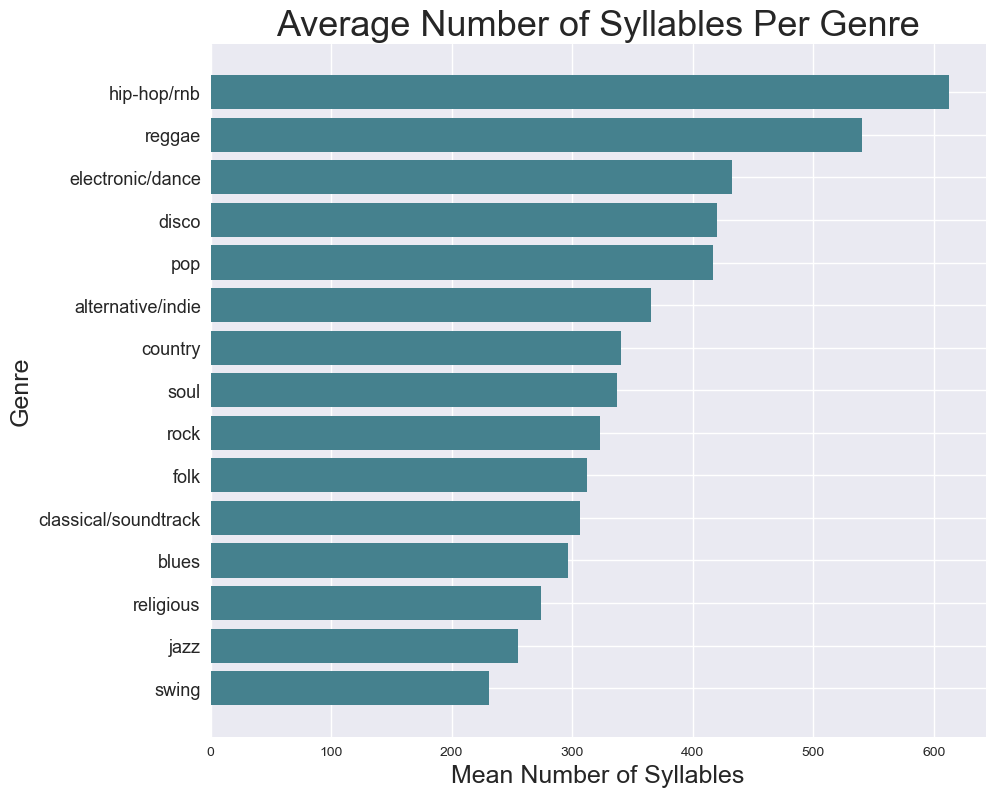

In [29]:
plot_word_features('num_syllables','Average Number of Syllables Per Genre','Mean Number of Syllables','#45818eff')

# Average Loudness per Genre

In [30]:
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D

In [31]:
def plot_word_features_2(feature,title,xlab,color,ascend=False):
    '''
    plot feature frequency across all genres
    Params:
    feature = song feature you want to plot for all genres
    title = plot's title name
    xlab = x-axis label name
    color = color of horizontal bars
    '''
    
    #plt.rcdefaults()
    #style.use('seaborn-deep')
    fig, ax = plt.subplots(figsize=(8,8))

    # Define y-axis labels (genres)
    genres_df = df_final_set.groupby(['agg_genre'],sort=False)[[feature]].mean()
    genres_df = genres_df.loc[genres_df.index != 'N/A']
    genres_arr = genres_df.sort_values(by=feature,ascending=ascend).index.values

    y_pos = np.arange(len(genres_arr))

    # Define x-axis labels (e.g. 'speechiness')
    performance_df = df_final_set.groupby(['agg_genre'],sort=False)[[feature]].mean()
    performance_df = performance_df.loc[performance_df.index != 'N/A']
    performance_arr = performance_df.sort_values(by=feature,ascending=ascend)[feature].values
    
    # adjust x-axis to make most negative loudness (jazz) the baseline
    counter = 0
    subtractor = performance_arr[0]
    for i in performance_arr:
        performance_arr[counter] = (i-subtractor)
        counter+=1
    
    # gradient color scheme for bars
    customcmap = [(x/24.0,  x/48.0, .5) for x in range(len(performance_df))]
    
    # plot horizontal bar graph
    ax.barh(y_pos, performance_arr, xerr=None, align='center',
            color=customcmap)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(genres_arr)
    ax.set_xticklabels('')
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.invert_xaxis()
    #ax.set_xlabel(xlab,fontsize=18)
    #ax.set_xticks('none')
    #ax.xaxis.set_ticks_position('none')
   
    ax.set_ylabel('Genre',fontsize=18)
    ax.set_title(title,fontsize=26)
    ax.invert_xaxis()

    
    # legend
    a = 0.8
    # Create a fake colorbar
    ctb = LinearSegmentedColormap.from_list('custombar', customcmap, N=2048)
    # Trick from http://stackoverflow.com/questions/8342549/
    # matplotlib-add-colorbar-to-a-sequence-of-line-plots
    sm = plt.cm.ScalarMappable(cmap=ctb, norm=plt.Normalize(vmin=0, vmax=12))
    # Fake up the array of the scalar mappable
    sm._A = []

    # Set colorbar, aspect ratio
    cbar = plt.colorbar(sm, alpha=0.10, aspect=16, shrink=0.6)
    cbar.solids.set_edgecolor("face")
    # Remove colorbar container frame
    cbar.outline.set_visible(False)
    # Fontsize for colorbar ticklabels
    cbar.ax.tick_params(labelsize=16)
    # Customize colorbar tick labels
    mytks = range(0,13,2)
    cbar.set_ticks(mytks)
    cbar.ax.set_yticklabels([0,1,2,3,4,5,6], alpha=a,fontsize=10)
    cbar.ax.invert_yaxis()
    #cbar.ax.set_yticklabels([('-' + str(a)) for a in mytks], alpha=a,fontsize=10)

    # Colorbar label, customize fontsize and distance to colorbar
    cbar.set_label('Mean Loudness (in decibels+12)', alpha=a, 
                   rotation=270, fontsize=16, labelpad=20)
    # Remove color bar tick lines, while keeping the tick labels
    cbarytks = plt.getp(cbar.ax.axes, 'yticklines')
    plt.setp(cbarytks, visible=False)
    
    
    
    # Save options
    save = 'images/' + str(feature) + '_breakdown'

    if save:
        print('Saving graph to:', save + '.svg')
        plt.savefig(save + '.svg', format='svg')

    plt.show()

In [32]:
style.use('seaborn')

Saving graph to: images/loudness_breakdown.svg


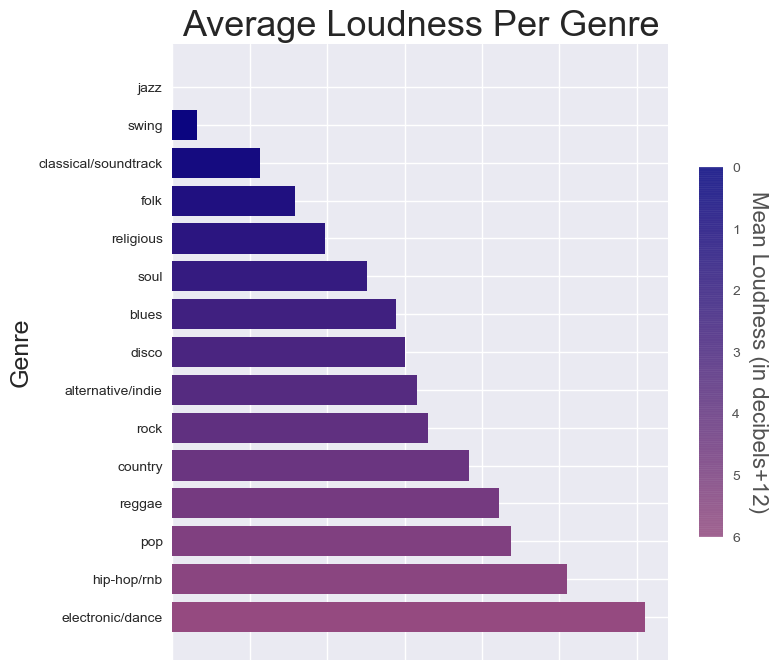

In [33]:
plot_word_features_2('loudness',"Average Loudness Per Genre",'Mean Loudness','#3c78d8ff',True)

In [34]:
performance_df = df_final_set.groupby(['agg_genre'],sort=False)[['loudness']].mean()
performance_df = performance_df.loc[performance_df.index != 'N/A']
performance_arr = performance_df.sort_values(by='loudness',ascending=True)['loudness'].values

In [35]:
performance_arr

array([-12.07649351, -11.75447826, -10.94059091, -10.49594737,
       -10.09949333,  -9.56111538,  -9.1926    ,  -9.07182192,
        -8.91322835,  -8.76726378,  -8.24563258,  -7.85041509,
        -7.70556393,  -6.97383989,  -5.97142529])

In [36]:
counter = 0
subtractor = performance_arr[0]
for i in performance_arr:
    performance_arr[counter] = (i-subtractor)
    counter+=1

In [37]:
performance_arr

array([0.        , 0.32201525, 1.1359026 , 1.58054614, 1.97700017,
       2.51537812, 2.88389351, 3.00467159, 3.16326516, 3.30922972,
       3.83086093, 4.22607841, 4.37092957, 5.10265362, 6.10506822])

# Average sentiment per Genre

In [ ]:
# Define y-axis labels (genres)
genres_df = df_final_set.groupby(['agg_genre'],sort=False)[['loudness']].mean()
genres_df = genres_df.loc[genres_df.index != 'N/A']
genres_arr = genres_df.sort_values(by='loudness',ascending=True).index.values
genres_arr

In [38]:
def plot_word_features_3(feature,title,xlab,color,ascend=False):
    '''
    plot feature frequency across all genres
    Params:
    feature = song feature you want to plot for all genres
    title = plot's title name
    xlab = x-axis label name
    color = color of horizontal bars
    '''
    
    #plt.rcdefaults()
    #style.use('seaborn-deep')
    fig, ax = plt.subplots(figsize=(8,8))

    # Define y-axis labels (genres)
    genres_df = df_final_set.groupby(['agg_genre'],sort=False)[[feature]].mean()
    genres_df = genres_df.loc[genres_df.index != 'N/A']
    genres_arr = genres_df.sort_values(by=feature,ascending=ascend).index.values

    y_pos = np.arange(len(genres_arr))

    # Define x-axis labels (e.g. 'speechiness')
    performance_df = df_final_set.groupby(['agg_genre'],sort=False)[[feature]].mean()
    performance_df = performance_df.loc[performance_df.index != 'N/A']
    performance_arr = performance_df.sort_values(by=feature,ascending=ascend)[feature].values
    
    # gradient color scheme for bars
    customcmap = [(x/24.0,  x/20.0, 0.2) for x in range(len(performance_df))]
    
    # plot horizontal bar graph
    ax.barh(y_pos, performance_arr, xerr=None, align='center',
            color=customcmap)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(genres_arr)
    ax.set_xticklabels('')
    ax.invert_yaxis()  # labels read top-to-bottom
    #ax.set_xlabel(xlab,fontsize=18)
    #ax.set_xticks('none')
    #ax.xaxis.set_ticks_position('none')
   
    ax.set_ylabel('Genre',fontsize=18)
    ax.set_title(title,fontsize=26)
    #ax.invert_xaxis()
    
    # legend
    a = 0.8
    # Create a fake colorbar
    ctb = LinearSegmentedColormap.from_list('custombar', customcmap, N=2048)
    # Trick from http://stackoverflow.com/questions/8342549/
    # matplotlib-add-colorbar-to-a-sequence-of-line-plots
    sm = plt.cm.ScalarMappable(cmap=ctb, norm=plt.Normalize(vmin=0, vmax=7))
    # Fake up the array of the scalar mappable
    sm._A = []

    # Set colorbar, aspect ratio
    cbar = plt.colorbar(sm, alpha=0.10, aspect=16, shrink=0.6)
    cbar.solids.set_edgecolor("face")
    # Remove colorbar container frame
    cbar.outline.set_visible(False)
    # Fontsize for colorbar ticklabels
    cbar.ax.tick_params(labelsize=16)
    # Customize colorbar tick labels
    mytks = range(0,8,1)
    cbar.set_ticks(mytks)
    cbar.ax.set_yticklabels([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7], alpha=a,fontsize=10)
    #cbar.ax.set_yticklabels([('-' + str(a)) for a in mytks], alpha=a,fontsize=10)
    cbar.ax.invert_yaxis()

    # Colorbar label, customize fontsize and distance to colorbar
    cbar.set_label('Average Sentiment', alpha=a, 
                   rotation=270, fontsize=16, labelpad=20)
    # Remove color bar tick lines, while keeping the tick labels
    cbarytks = plt.getp(cbar.ax.axes, 'yticklines')
    plt.setp(cbarytks, visible=False)
    
    
    
    # Save options
    save = 'images/' + str(feature) + '_breakdown'

    if save:
        print('Saving graph to:', save + '.svg')
        plt.savefig(save + '.svg', format='svg')

    plt.show()

Saving graph to: images/sentiment_compound_breakdown.svg


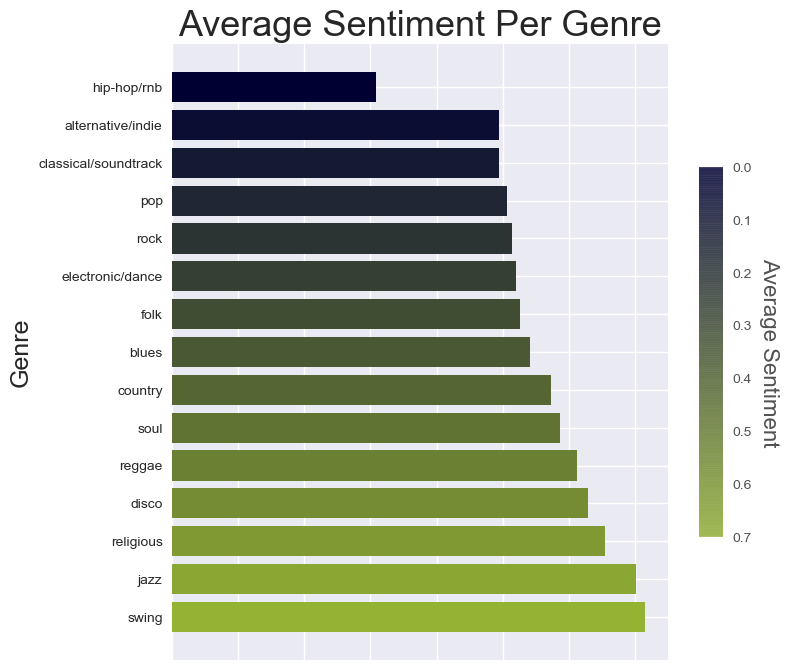

In [39]:
plot_word_features_3('sentiment_compound','Average Sentiment Per Genre','Mean Polarity Score','#cc4125ff',True)

# Conclusion

- Per **Flesch-Kincaid Grade Level**, songs became less complex from 1950s to 1990s; from 1990s onwards, songs jumped in complexity
- Per **Sentiment Analysis**, songs became less positive over time
- Instrument-based genres (e.g. Rock, Jazz, Folk) was popular earlier on; gradually Rock became the dominant genre till 1990s, when other genres such as hip-hop / R&B / electronic / dance took over in popularity
- The rise in **song complexity**, along with the fall in **song polarity**, may be due to the uprise of the Hip-Hop / R&B genre, where on average, their lyrics are at the top for the following audio features: 'Speechiness', number of Syllables, word count, and number of difficult words
- Overtime, people have grown to like loud music more (less Billboard-represented genres such as jazz, blues, and folk on average on less loud than other genres) 


# Text Analysis
- LDA Topic modeling
- Word2Vec --> Nearest Neighbor

# using lemmatization + gensim to clean up lyrics_list

In [43]:
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string

stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in lyrics_list] 

In [44]:
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# LDA Topic Modeling

In [45]:
'''
Extend tweets with 2-grams and 3-grams, then build a gensim dictionary.
'''
import nltk
from gensim import corpora

def ngrams(tokens, n):
    """Extend a list of tokens with its own space-separated i-grams, where i = 2,...,n."""
    tokens1 = tokens[:]
    if n > 1:
        tokens0 = tokens[:]
        for i in range(2,n+1):
            tokens1.extend([' '.join(a) for a in nltk.ngrams(tokens0,i)])
    return tokens1

In [46]:
# Extend tweets with n-grams. (list of lists, where each inner-list is the tweet's engrams)
lyrics_extended = [ngrams(text,3) for text in lyrics_texts]

In [47]:
# build gensim dictionaries for each sentiment group
lyrics_id2word = corpora.Dictionary(lyrics_texts)

In [48]:
# len of each gensim dictionary
lyrics_n_terms = len(lyrics_id2word)

In [49]:
# corpus for each sentiment group of tweets
lyrics_corpus = [lyrics_id2word.doc2bow(t) for t in lyrics_texts]

# Build LDA model

In [50]:
from gensim import models

# variables to set for LDA modeling
corpus = doc_term_matrix
id2word = dictionary
num_topics = 5
random_state = 42
chunk_size = 2000
passes = 50

In [51]:
pos_lda_model = models.ldamulticore.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=random_state,
                                           chunksize=chunk_size,
                                           passes=passes,
                                           per_word_topics=False)

In [52]:
pprint(pos_lda_model.print_topics())

[(0,
  '0.032*"la" + 0.016*"get" + 0.009*"come" + 0.009*"like" + 0.008*"let" + '
  '0.008*"im" + 0.008*"baby" + 0.007*"down" + 0.007*"doo" + 0.006*"got"'),
 (1,
  '0.036*"love" + 0.020*"im" + 0.019*"know" + 0.014*"baby" + 0.011*"time" + '
  '0.010*"never" + 0.009*"one" + 0.009*"cant" + 0.009*"say" + 0.009*"go"'),
 (2,
  '0.028*"na" + 0.021*"come" + 0.016*"like" + 0.013*"go" + 0.010*"take" + '
  '0.007*"song" + 0.007*"back" + 0.007*"on" + 0.007*"baby" + 0.007*"home"'),
 (3,
  '0.043*"oh" + 0.022*"yeah" + 0.017*"baby" + 0.016*"want" + 0.015*"im" + '
  '0.015*"it" + 0.014*"know" + 0.014*"like" + 0.013*"ooh" + 0.012*"get"'),
 (4,
  '0.021*"im" + 0.021*"get" + 0.018*"like" + 0.016*"got" + 0.012*"yeah" + '
  '0.011*"aint" + 0.009*"up" + 0.008*"know" + 0.008*"back" + 0.008*"girl"')]


# Wordclouds

In [53]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline


In [54]:
df_final_set[['artist','title','lyrics']].head()

,artist,title,lyrics
0,Nat King Cole,Mona Lisa,"Mona Lisa, Mona Lisa, men have named you\nYou'..."
1,Andrews Sisters,I Wanna Be Loved,I wanna be Loved\nBy Andrews Sisters\n\nOooo-o...
2,Patti Page,Tennessee Waltz,I was dancing with my darling to the Tennessee...
3,Tennessee Ernie Ford,I'll Never Be Free,Each time I hold someone new\nMy arms grow col...
4,Patti Page,All My Love,"Unfortunately, we are not licensed to display ..."


## prep stopwords and list of lyrics

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from gensim.models import Word2Vec

stop_words = ENGLISH_STOP_WORDS | {'?','!','.',',',':',';','oh oh','just',"I'm",'oh','it','Cause','na','la'}

lyrics_list = list(df_final_set['lyrics']) # list of all 4000+ track lyrics
lyrics_list = [i.replace('\n',' ') for i in lyrics_list] # replace line breaks with whitespace

lyrics_texts = [[word for word in document.lower().split() if word not in stop_words]
        for document in lyrics_list]

## Helper function to generate word cloud

In [58]:
def word_cloud(lyrics_list,stop_words,year):
    
    # combine all lyrics
    lyrics_all = " ".join(song_lyrics for song_lyrics in lyrics_list)

    # include stopwords into wordcloud arguments
    wordcloud = WordCloud(stopwords=stop_words,background_color='white',max_words=200,width=1920,height=1080).generate(lyrics_all)

    # display generated image
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
    # Save the image in the img folder:
    wordcloud.to_file("images/wordcloud_" + str(year) +  ".png")

## word cloud for 1960s

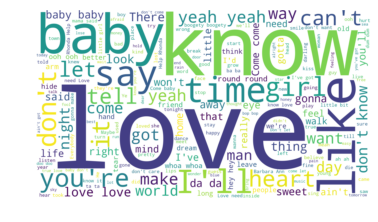

In [59]:
lyrics_1960s = list(df_final_set.loc[df_final_set['decade']=='60s','lyrics'])
lyrics_1960s = [i.replace('\n',' ') for i in lyrics_1960s] # replace line breaks with whitespace


word_cloud(lyrics_1960s,stop_words,1960)

## word cloud for 1970s

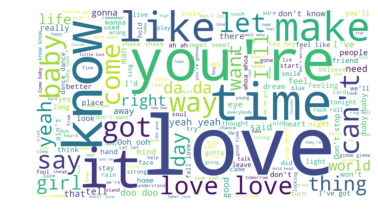

In [60]:
lyrics_1970s = list(df_final_set.loc[df_final_set['decade']=='70s','lyrics'])
lyrics_1970s = [i.replace('\n',' ') for i in lyrics_1970s] # replace line breaks with whitespace


word_cloud(lyrics_1970s,stop_words,1970)

## word cloud for 1980s

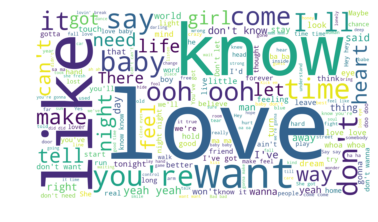

In [61]:
lyrics_1980s = list(df_final_set.loc[df_final_set['decade']=='80s','lyrics'])
lyrics_1980s = [i.replace('\n',' ') for i in lyrics_1980s] # replace line breaks with whitespace


word_cloud(lyrics_1980s,stop_words,1980)

## word cloud for 1990s

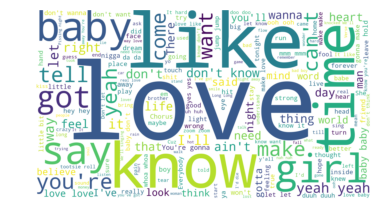

In [62]:
lyrics_1990s = list(df_final_set.loc[df_final_set['decade']=='90s','lyrics'])
lyrics_1990s = [i.replace('\n',' ') for i in lyrics_1990s] # replace line breaks with whitespace


word_cloud(lyrics_1990s,stop_words,1990)

## word cloud for 2000s

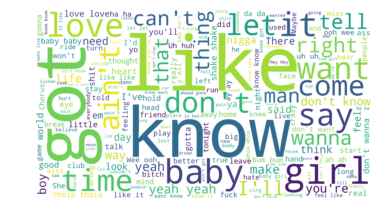

In [63]:
lyrics_2000s = list(df_final_set.loc[df_final_set['decade']=='00s','lyrics'])
lyrics_2000s = [i.replace('\n',' ') for i in lyrics_2000s] # replace line breaks with whitespace


word_cloud(lyrics_2000s,stop_words,2000)

## word cloud for 2010s

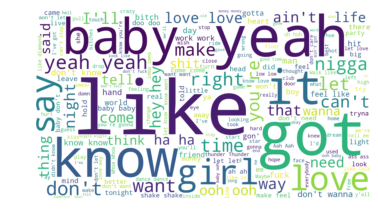

In [65]:
lyrics_2010s = list(df_final_set.loc[df_final_set['decade']=='10s','lyrics'])
lyrics_2010s = [i.replace('\n',' ') for i in lyrics_2010s] # replace line breaks with whitespace


word_cloud(lyrics_2010s,stop_words,2010)

## word cloud for all decades

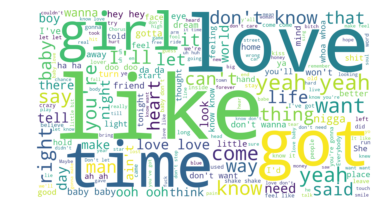

In [66]:
lyrics_all = list(df_final_set['lyrics'])
lyrics_all = [i.replace('\n',' ') for i in lyrics_all] # replace line breaks with whitespace


word_cloud(lyrics_all,stop_words,'all')

## word cloud for 1990 and onwards

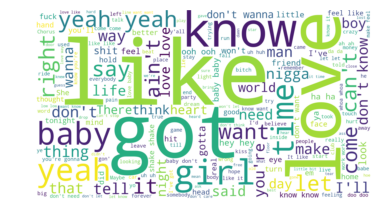

In [67]:
lyrics_after_90 = list(df_final_set.loc[df_final_set['year']>1990,'lyrics'])
lyrics_after_90 = [i.replace('\n',' ') for i in lyrics_after_90] # replace line breaks with whitespace


word_cloud(lyrics_after_90,stop_words,'after_90')

## word cloud for 1950-1990

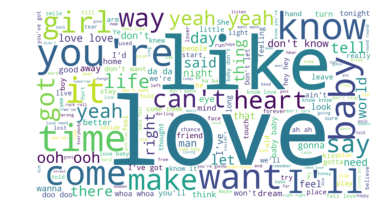

In [69]:
lyrics_before_90 = list(df_final_set.loc[df_final_set['year']<1990,'lyrics'])
lyrics_before_90 = [i.replace('\n',' ') for i in lyrics_before_90] # replace line breaks with whitespace


word_cloud(lyrics_before_90,stop_words,'before_90')

# Next Steps: try incorporating other audio features with the vectorized lyrics

You will need to concatenate the audio features values to each track's vectorized array

# Description of data fields in df

# Spotify API audio features

### Features include:

- "acousticness": 0.833,
- "analysis_url": "https://api.spotify.com/v1/audio-analysis/5k7VKj1Xwy5DjO4B0PdAOb",
- "danceability": 0.537,
- "duration_ms": 255387,
- "energy": 0.342,
- "id": "5k7VKj1Xwy5DjO4B0PdAOb",
- "instrumentalness": 0.6,
- "key": 4,
- "liveness": 0.0856,
- "loudness": -9.785,
- "mode": 1,
- "speechiness": 0.0338,
- "tempo": 128.331,
- "time_signature": 3,
- "track_href": "https://api.spotify.com/v1/tracks/5k7VKj1Xwy5DjO4B0PdAOb",
- "type": "audio_features",
- "uri": "spotimfy:track:5k7VKj1Xwy5DjO4B0PdAOb",
- "valence": 0.156

# Music EDA Passion Project

Purpose of this project is to look at the Billboard Hot 100 songs from 1950-2018 and see how music has evolved over the last 65+ years. 

We will be using a dataset curated and shared by Kevin Schaich (github page available)

We will also use the Spotify API to get audio features (TBD on what we are using features for)

we will also built a Flask app that allows the end-user to:
- Look up Billboard Hot 100 singles (any song between 1950 to 2018)
- Based on searched song, recommend four other popular songs based on song lyrics